In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import functools
import math
import neurons
import normalization
import networks
import struct
import matplotlib.pyplot as plt

In [2]:
irisData = numpy.genfromtxt("datasets/iris/iris.csv",  delimiter=",", dtype="float, float, float, float, S20")

# open the mnist data set. http://yann.lecun.com/exdb/mnist
mnist_training_images = open("datasets/mnist/train-images-idx3-ubyte", 
                  mode="rb")

mnist_training_labels = open("datasets/mnist/train-labels.idx1-ubyte", 
                  mode="rb")

magic_number = int.from_bytes(mnist_training_images.read(4), byteorder="big")
number_of_training_images = int.from_bytes(mnist_training_images.read(4), byteorder="big")
image_height = int.from_bytes(mnist_training_images.read(4), byteorder="big")
image_width = int.from_bytes(mnist_training_images.read(4), byteorder="big")

# read an image into a matrix
read_next_image = lambda file_object: [int.from_bytes(file_object.read(1), byteorder="big") for _ in range(image_height * image_width)]

convert_to_matrix = lambda file_object: [[int.from_bytes(file_object.read(1), byteorder="big") for columns in  range(image_width)] for row in range(image_height)]

# Training set Metadata
print("Magic number:", magic_number);
print("Number of training images:", number_of_training_images);
print("Image height x width:", image_height, image_width);

Magic number: 2051
Number of training images: 60000
Image height x width: 28 28


In [3]:
# Create a feed forward network that recognozes the input image


# The number of input neurons is the number of pixels per image.
input_neuron_count = image_height * image_width

                    #Input layer
layer_properties = ({"neuron_type": neurons.LinearActivationNeuron, 
                     "neuron_count": input_neuron_count,
                     "bias": 1},
                    
                    #Hidden layer
                    {"neuron_type": neurons.SigmoidActivationNeuron, 
                     "neuron_count": 15,
                     "bias": 1},
                    
                    #Output layer - 1 neuron for each possible digit
                    {"neuron_type": neurons.SigmoidActivationNeuron, 
                     "neuron_count": 10})

network = networks.FeedForwardNetwork(layer_properties)
print(numpy.array(network))

0 1 [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], 

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0, 0.9686274509803922, 0.4980392156862745, 0.0, 0

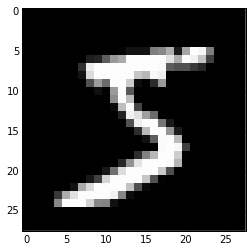

In [4]:


normalizer = normalization.Range((0, 255))
#print(read_image(mnist_training_images))

image = read_next_image(mnist_training_images)
image_matrix = numpy.array(image).reshape(image_width, image_height)
normalized_image = normalizer.normalize(image);

plt.imshow(image_matrix, "gray", interpolation="none")

print(network.compute(normalized_image))


# print(numpy.array(normalization.normalize([normalization.ZScore, 
#                                            normalization.ZScore,
#                                            normalization.ZScore, 
#                                            normalization.ZScore,
#                                            normalization.OneHot], irisData)))